# Advertisement detection

One of the major challenge in digital industry is to find whether a comment made on an article,blog,post, or a video is a genuine user comment or just an advertisement made to promote something. Here we have a dataset containing comments( both genuine and advertisement) with their corresponding tag. We need to suggest a solution to the company that identifies whther a comment made is an advertisment or a genuine comment.

The target is to predict whether a comment is an advertisement or not.

In [488]:
import numpy as np
import pandas as pd

In [489]:
ad= pd.read_excel('Challenge2.xlsx')

In [490]:
ad.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: kobyoshi02",1
1,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1
2,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ï»¿,1
3,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me what I should do next!ï»¿,1
4,z13xit5agm2zyh4f523rst2gowmbx5bml,Lone Twistt,2013-11-28T17:34:55,Once you have started reading do not stop. If you do not subscribe to me within one day you an...,1
5,z13pejoiuozwxtdu323dspopnri4xts0f,Archie Lewis,2013-11-28T17:54:39,https://twitter.com/GBphotographyGBï»¿,1
6,z12oglnpoq3gjh4om04cfdlbgp2uepyytpw0k,Francisco Nora,2013-11-28T19:52:35,please like :D https://premium.easypromosapp.com/voteme/19924/616375350ï»¿,1
7,z13phrmwrkfisn5er22eyrbpbvaiwfvwf04,Gaming and Stuff PRO,2013-11-28T21:14:13,"Hello! Do you like gaming, art videos, scientific experiments, tutorials, lyrics videos, and mu...",1
8,z13bgdvyluihfv11i22rgxwhuvabzz1os04,Zielimeek21,2013-11-28T21:49:00,I'm only checking the viewsï»¿,0
9,z12ohdxjtsatvppjb04cctprprb1slnxdf4,OutrightIgnite,2013-12-01T03:30:55,Show your AUBURN PRIDE HERE: http://www.teespring.com/tigermeathoodieï»¿,1


In [491]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 5 columns):
COMMENT_ID    1156 non-null object
AUTHOR        1156 non-null object
DATE          1018 non-null object
CONTENT       1156 non-null object
CLASS         1156 non-null int64
dtypes: int64(1), object(4)
memory usage: 45.2+ KB


In [492]:
ad['AUTHOR'].nunique()

1093

## Exploratory Data Analysis

In [493]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

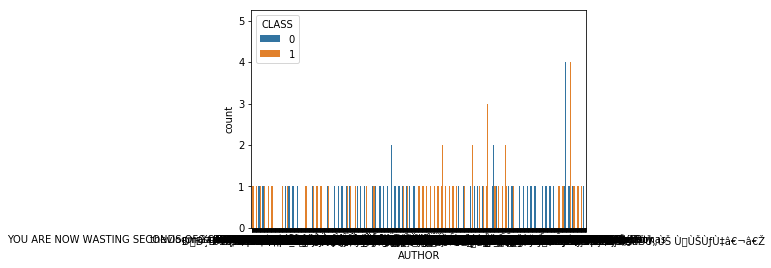

In [494]:
sns.countplot(x='AUTHOR', data=ad, hue='CLASS')

An author with multiple messages is slightly more likely to be an advertiser

In [495]:
import nltk

Checking the realtion between presence of a url in text and it being an advertisement. Presence of a url is checked by checking for words 'http' and 'https'.

In [496]:
def containsURL (msg):
    if 'http' in msg: 
        return True
    elif 'https' in msg:
        return True
    else:
        return False

In [497]:
ad['CONTAINS_URL']=ad['CONTENT'].apply(lambda x: containsURL(x))

In [498]:
ad.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTAINS_URL
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: kobyoshi02",1,False
1,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1,False
2,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ï»¿,1,False
3,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me what I should do next!ï»¿,1,False
4,z13xit5agm2zyh4f523rst2gowmbx5bml,Lone Twistt,2013-11-28T17:34:55,Once you have started reading do not stop. If you do not subscribe to me within one day you an...,1,False


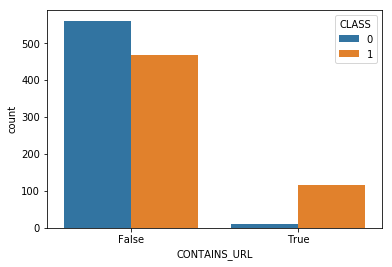

In [499]:
sns.countplot(x='CONTAINS_URL', data=ad, hue='CLASS')

A comment containing a url is likely to be an advertisement.

In [500]:
def containsChannel (msg):
    if 'channel' in msg:
        return True
    else:
        return False

In [501]:
ad['CONTAINS_CH']=ad['CONTENT'].apply(lambda x: containsURL(x))

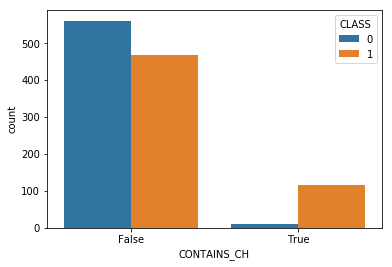

In [502]:
sns.countplot(x='CONTAINS_CH', data=ad, hue='CLASS')

A comment containing the word 'channel' is also likely to be advertisement.

In [503]:
ad['CONTENT_LEN']=ad['CONTENT'].apply(lambda x: len(x))

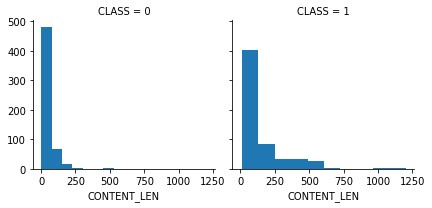

In [504]:
g=sns.FacetGrid(data=ad, col='CLASS')
g=g.map(plt.hist,'CONTENT_LEN')

Non-advertisement comments rarely go over 300 characters.

In [505]:
def triggers(msg):
    msg= msg.lower()
    if 'http' in msg:
        return True
    elif 'www' in msg:
        return True
    elif '.com' in msg:
        return True
    elif 'subscribe' in msg:
        return True
    elif 'channel' in msg:
        return True
    elif 'check' in msg and 'view' not in msg:
        return True
    elif 'like' in msg:
        return True
    elif 'follow' in msg:
        return True
    elif 'visit' in msg:
        return True
    else:
        return False

In [506]:
ad['triggered']=ad['CONTENT'].apply(lambda x: triggers(x))

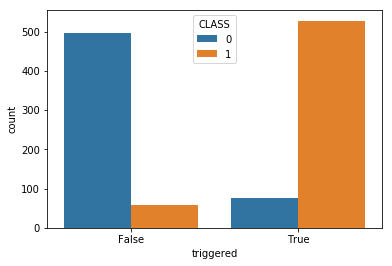

In [507]:
sns.countplot(x='triggered', data=ad, hue='CLASS')

In [508]:
pd.options.display.max_colwidth = 100
ad[(ad['triggered']==True) & (ad['CLASS']==0)]['CONTENT'].head(20)

12                           I dont even watch it anymore i just come here to check on 2 Billion or notï»¿
17                                                                             2 billion....Coming soonï»¿
37                                                             969,210 dislikes like dislike themselvesï»¿
50                               PSY - GANGNAM STYLE (ê°•ë‚¨ìŠ¤íƒ€ì¼) M/V: http://youtu.be/9bZkp7q19f0ï»¿
61     they said this video are not deserve 2billion views , while they keep  visiting it to watch the ...
73                               PSY - GANGNAM STYLE (ê°•ë‚¨ìŠ¤íƒ€ì¼) M/V: http://youtu.be/9bZkp7q19f0ï»¿
82                 Stupid people... this video doesnt have 2 billion visits. Have 2 thousands  millionsï»¿
110                                                The Guy in the yellow suit kinda looks like Jae-suk ï»¿
125                                                                  The most liked video on YouTube...ï»¿
127                                  

In [509]:
ad['CONTENT'][103]

'This is the best, funny and viral video of history (youtube) THE TRUEï»¿'

In [510]:
from sklearn.metrics import classification_report, confusion_matrix

In [511]:
print(confusion_matrix(ad['CLASS'], ad['triggered']))

[[496  75]
 [ 57 528]]


In [512]:
print(classification_report(ad['CLASS'], ad['triggered']))

             precision    recall  f1-score   support

          0       0.90      0.87      0.88       571
          1       0.88      0.90      0.89       585

avg / total       0.89      0.89      0.89      1156



## Text pre-processing

Removing punctutaion and stopwords from CONTENT

In [513]:
from nltk.corpus import stopwords

In [514]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rajat1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [515]:
import string

In [516]:
def preprocess(content):
    # removing punctuation
    nopunc = [char for char in content if char not in string.punctuation]
    
    # joining words back for better results
    nopunc = ''.join(nopunc)
    
    # removing stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [517]:
ad['processed']=ad['CONTENT'].apply(lambda x: preprocess(x))

In [518]:
ad.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTAINS_URL,CONTAINS_CH,CONTENT_LEN,triggered,processed
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: kobyoshi02",1,False,False,56,True,"[Huh, anyway, check, youtube, channel, kobyoshi02]"
1,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1,False,False,41,True,"[watchvvtaRGgvGtWQ, Check, ï»¿]"
2,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ï»¿,1,False,False,27,True,"[Subscribe, channel, ï»¿]"
3,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me what I should do next!ï»¿,1,False,False,69,True,"[u, shouldd, check, channel, tell, nextï»¿]"
4,z13xit5agm2zyh4f523rst2gowmbx5bml,Lone Twistt,2013-11-28T17:34:55,Once you have started reading do not stop. If you do not subscribe to me within one day you an...,1,False,False,181,True,"[started, reading, stop, subscribe, within, one, day, youre, entire, family, die, want, stay, al..."


Vectorization

In [519]:
from sklearn.feature_extraction.text import CountVectorizer

In [520]:
bow_transformer = CountVectorizer(analyzer=preprocess).fit(ad['processed'])

In [521]:
messages_bow = bow_transformer.transform(ad['processed'])

In [522]:
# TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfTransformer

In [523]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Training the model

In [524]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [525]:
X_train, X_test, y_train, y_test=train_test_split(messages_tfidf, ad['CLASS'], test_size=0.33, random_state=42)

ad_detect=  MultinomialNB().fit(X_train, y_train)

In [526]:
predictions= ad_detect.predict(X_test)

Checking the predictions

In [527]:
from sklearn.metrics import classification_report, confusion_matrix

In [528]:
print (confusion_matrix(y_test, predictions))

[[184   0]
 [158  40]]


In [529]:
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.54      1.00      0.70       184
          1       1.00      0.20      0.34       198

avg / total       0.78      0.59      0.51       382



## Data Cleaning

In [530]:
ad.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTAINS_URL,CONTAINS_CH,CONTENT_LEN,triggered,processed
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: kobyoshi02",1,False,False,56,True,"[Huh, anyway, check, youtube, channel, kobyoshi02]"
1,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1,False,False,41,True,"[watchvvtaRGgvGtWQ, Check, ï»¿]"
2,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ï»¿,1,False,False,27,True,"[Subscribe, channel, ï»¿]"
3,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me what I should do next!ï»¿,1,False,False,69,True,"[u, shouldd, check, channel, tell, nextï»¿]"
4,z13xit5agm2zyh4f523rst2gowmbx5bml,Lone Twistt,2013-11-28T17:34:55,Once you have started reading do not stop. If you do not subscribe to me within one day you an...,1,False,False,181,True,"[started, reading, stop, subscribe, within, one, day, youre, entire, family, die, want, stay, al..."


In [531]:
ad['CONTENT'].head(10)

0                                               Huh, anyway check out this you[tube] channel: kobyoshi02
1                                                              watch?v=vtaRGgvGtWQ   Check this out .ï»¿
2                                                                            Subscribe to my channel ï»¿
3                                  and u should.d check my channel and tell me what I should do next!ï»¿
4     Once you have started reading do not stop. If you do not subscribe to me  within one day you an...
5                                                                 https://twitter.com/GBphotographyGBï»¿
6                             please like :D https://premium.easypromosapp.com/voteme/19924/616375350ï»¿
7    Hello! Do you like gaming, art videos, scientific experiments, tutorials,  lyrics videos, and mu...
8                                                                         I'm only checking the viewsï»¿
9                               Show your AUBURN PRIDE 

In [532]:
import string

In [533]:
eng=string.printable
eng

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [534]:
# Removing punctuation

ad['CONTENT']=ad['CONTENT'].apply(lambda x: x.encode("ascii", errors="ignore").decode())
ad['CONTENT']

0                                                  Huh, anyway check out this you[tube] channel: kobyoshi02
1                                                                    watch?v=vtaRGgvGtWQ   Check this out .
2                                                                                  Subscribe to my channel 
3                                        and u should.d check my channel and tell me what I should do next!
4        Once you have started reading do not stop. If you do not subscribe to me  within one day you an...
5                                                                       https://twitter.com/GBphotographyGB
6                                   please like :D https://premium.easypromosapp.com/voteme/19924/616375350
7       Hello! Do you like gaming, art videos, scientific experiments, tutorials,  lyrics videos, and mu...
8                                                                               I'm only checking the views
9                           

In [535]:
# Removing HTML tags

import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [536]:
ad['CONTENT']= ad['CONTENT'].apply(lambda x: cleanhtml(x))
ad['CONTENT']

0                                                  Huh, anyway check out this you[tube] channel: kobyoshi02
1                                                                    watch?v=vtaRGgvGtWQ   Check this out .
2                                                                                  Subscribe to my channel 
3                                        and u should.d check my channel and tell me what I should do next!
4        Once you have started reading do not stop. If you do not subscribe to me  within one day you an...
5                                                                       https://twitter.com/GBphotographyGB
6                                   please like :D https://premium.easypromosapp.com/voteme/19924/616375350
7       Hello! Do you like gaming, art videos, scientific experiments, tutorials,  lyrics videos, and mu...
8                                                                               I'm only checking the views
9                           

In [537]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [538]:
# Removing punctuation

def removepunc(s):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    return (s.translate(translator))

In [539]:
ad['CONTENT']=ad['CONTENT'].apply(lambda x: removepunc(x))
ad['CONTENT']

0                                                  Huh  anyway check out this you tube  channel  kobyoshi02
1                                                                    watch v vtaRGgvGtWQ   Check this out  
2                                                                                  Subscribe to my channel 
3                                        and u should d check my channel and tell me what I should do next 
4        Once you have started reading do not stop  If you do not subscribe to me  within one day you an...
5                                                                       https   twitter com GBphotographyGB
6                                   please like  D https   premium easypromosapp com voteme 19924 616375350
7       Hello  Do you like gaming  art videos  scientific experiments  tutorials   lyrics videos  and mu...
8                                                                               I m only checking the views
9                           

In [540]:
# Replace multiple spaces with single space

ad['CONTENT']=ad['CONTENT'].apply(lambda x: re.sub(' +', ' ',x))
ad['CONTENT']

0                                                     Huh anyway check out this you tube channel kobyoshi02
1                                                                       watch v vtaRGgvGtWQ Check this out 
2                                                                                  Subscribe to my channel 
3                                        and u should d check my channel and tell me what I should do next 
4        Once you have started reading do not stop If you do not subscribe to me within one day you and ...
5                                                                         https twitter com GBphotographyGB
6                                      please like D https premium easypromosapp com voteme 19924 616375350
7       Hello Do you like gaming art videos scientific experiments tutorials lyrics videos and much much...
8                                                                               I m only checking the views
9                           

Converting to lower case

In [541]:
ad['CONTENT']=ad['CONTENT'].apply(lambda x: x.lower())
ad['CONTENT']

0                                                     huh anyway check out this you tube channel kobyoshi02
1                                                                       watch v vtarggvgtwq check this out 
2                                                                                  subscribe to my channel 
3                                        and u should d check my channel and tell me what i should do next 
4        once you have started reading do not stop if you do not subscribe to me within one day you and ...
5                                                                         https twitter com gbphotographygb
6                                      please like d https premium easypromosapp com voteme 19924 616375350
7       hello do you like gaming art videos scientific experiments tutorials lyrics videos and much much...
8                                                                               i m only checking the views
9                           

In [542]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Correcting spelling mistakes

In [543]:
#from autocorrect import spell

In [544]:
#def correctwords (s):
#    words= s.split()
#    correctWords=[spell(x) for x in words]
#    return ' '.join(correctWords)

In [545]:
#ad['CONTENT']=ad['CONTENT'].apply(lambda x: correctwords(x))
#ad['CONTENT']

Applying stemming and lemmatisation

In [546]:
import nltk

In [547]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/rajat1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [548]:
from nltk.stem.porter import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer 

In [549]:
def stemlem(s):
    stem= PorterStemmer()
    lem= WordNetLemmatizer()
    words= s.split()
    stemmed= [stem.stem(x) for x in words]
    lemmed= [lem.lemmatize(x, "v") for x in stemmed]
    new= ' '.join(lemmed)
    #new= ' '.join(stemmed)
    return new
    #return s

In [550]:
stemlem("peoples of the earth i have seen how you")

'peopl of the earth i have see how you'

In [551]:
ad['CONTENT']=ad['CONTENT'].apply(lambda x: stemlem(x))
ad['CONTENT']

0                                                      huh anyway check out thi you tube channel kobyoshi02
1                                                                         watch v vtarggvgtwq check thi out
2                                                                                    subscrib to my channel
3                                         and u should d check my channel and tell me what i should do next
4       onc you have start read do not stop if you do not subscrib to me within one day you and you re e...
5                                                                          http twitter com gbphotographygb
6                                         pleas like d http premium easypromosapp com votem 19924 616375350
7       hello do you like game art video scientif experi tutori lyric video and much much more of that i...
8                                                                                   i m onli check the view
9                           

In [552]:
from sklearn.feature_extraction.text import CountVectorizer

In [637]:
bow_transformer = CountVectorizer(ngram_range=(1, 1),max_df=10.0, min_df=5).fit(ad['CONTENT'])

In [638]:
messages_bow = bow_transformer.transform(ad['CONTENT'])

In [639]:
# TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfTransformer

In [640]:
tfidf_transformer = TfidfTransformer(sublinear_tf=False).fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

Training the model and evaluation

In [641]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [642]:
X_train, X_test, y_train, y_test=train_test_split(messages_tfidf, ad['CLASS'], test_size=0.33, random_state=42)
ad_detect=  MultinomialNB().fit(X_train, y_train)

In [643]:
predictions= ad_detect.predict(X_test)

In [644]:
from sklearn.metrics import classification_report, confusion_matrix

In [645]:
print (confusion_matrix(y_test, predictions))

[[177   7]
 [ 18 180]]


In [647]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93       184
          1       0.96      0.91      0.94       198

avg / total       0.94      0.93      0.93       382



In [648]:
#Final_Score
Final_score=ad_detect.score(X_test,y_test)
print(Final_score)

0.9345549738219895


In [649]:
#PercentageOfNonSpamPostsPredicted
number_of_non_spam_posts = sum(confusion_matrix(y_test, predictions)[0])
number_of_spam_posts = sum(confusion_matrix(y_test, predictions)[1])
Total_posts = number_of_non_spam_posts+number_of_spam_posts
print( (number_of_non_spam_posts)/(Total_posts)*100 )

48.167539267015705
